# Regularization

In [195]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

import pylab as pl

sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)


In [196]:
from sklearn.datasets import load_boston
bos = load_boston()

In [197]:
bos.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [198]:
bos.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [199]:
# In order to do multiple regression we need to add a column of 1s for x0
X = np.array([np.concatenate((v,[1])) for v in bos.data])
y = bos.target

In [200]:
bos.data.shape

(506, 13)

In [201]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [202]:
# Compute RMSE on all data
y_pred = linreg.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

4.6795063006355164

In [203]:
y_m=np.mean(y)
y_m

22.532806324110677

In [204]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

4.6795063006355164

In [205]:
rmse/y_m

0.20767525506258513

## Validation

Let's properly divide the data to have a training and a testing set.


In [206]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)


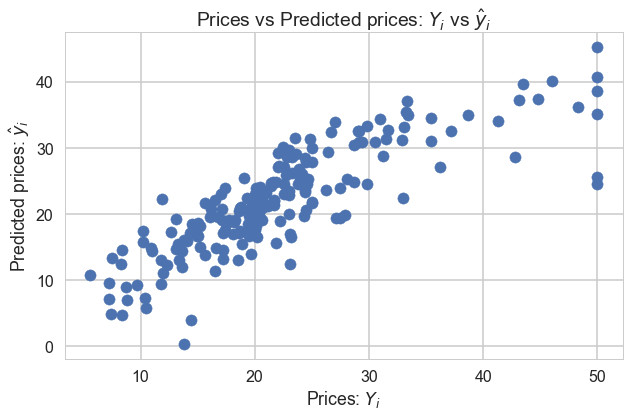

In [207]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [208]:
print (linreg.intercept_)
print (linreg.coef_)

45.4814195933
[ -1.03747356e-01   5.58589924e-02   5.88240770e-02   2.50523544e+00
  -1.90284888e+01   3.25353601e+00  -3.22150522e-03  -1.57603462e+00
   2.58716068e-01  -1.14681299e-02  -1.10777478e+00   5.50051783e-03
  -5.59569992e-01   0.00000000e+00]


In [209]:
np.median(y_test)

20.600000000000001

In [210]:
y_m=np.mean(y_test)

In [211]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

5.0790909481133744

In [212]:
rmse/y_m

0.22864582039007741

## Compare our testing RMSE with null RMSE

A data set has $n$ values marked $y_1$,...,$y_n$ (collectively known as $y_i$ or as a vector $y = [y_1,..., y_n]^T$), each associated with a predicted (or modeled) value $\hat{y}_{1},...,\hat{y}_{n}$.

We define the residuals as as $e_i = y_i − \hat{y}_{i}$ (forming a vector $e$).

If $\bar{y}$ is the mean of the observed data:

$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i $$

then the variability of the data set can be measured using three sums of square formulas:

* The total sum of squares (proportional to the variance of the data):

 $$SS_\text{tot}=\sum_i (y_i-\bar{y})^2,$$

* The regression sum of squares, also called the explained sum of squares:

$$SS_\text{reg}=\sum_i (\hat{y}_{i} -\bar{y})^2,$$

* The sum of squares of residuals, also called the residual sum of squares:

$$SS_\text{res}=\sum_i (y_i - \hat{y}_{i})^2=\sum_i e_i^2\,$$



In [213]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
y_null[0:33]

array([ 22.2137931,  22.2137931,  22.2137931,  22.2137931,  22.2137931,
        22.2137931,  22.2137931,  22.2137931,  22.2137931,  22.2137931,
        22.2137931,  22.2137931,  22.2137931,  22.2137931,  22.2137931,
        22.2137931,  22.2137931,  22.2137931,  22.2137931,  22.2137931,
        22.2137931,  22.2137931,  22.2137931,  22.2137931,  22.2137931,
        22.2137931,  22.2137931,  22.2137931,  22.2137931,  22.2137931,
        22.2137931,  22.2137931,  22.2137931])

In [214]:
y_null_rmse =np.sqrt(metrics.mean_squared_error(y_test, y_null))
y_null_rmse

9.0956334945155657

In [215]:
y_null_rmse/y_test.mean()

0.40945881921911115

## N-fold cross-validation

sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)   


The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:


## KFold

sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)

[KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)  


In [216]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=5)

## What the K-Folds cross-validator does

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.


In [217]:
for train,test in kf:
    print (train)
    print (test)  

[102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 34

In [218]:
scores = []
for train, test in kf:
    linreg.fit(X[train],y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
scores

[3.5327963728837646,
 5.1084442514070476,
 5.7549939941491681,
 8.9907204260114071,
 5.7952010881678842]

In [219]:
np.mean(scores)

5.836431226523854

In [220]:
np.median(scores)

5.7549939941491681

In [221]:
np.std(scores)

1.7773334451348539

In [222]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [223]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 5.079
RMSE on 5-fold CV: 5.836


## Regularization

- Regularization is a method for "constraining" or "regularizing" the **size of the coefficients**, thus "shrinking" them towards zero.
- It reduces model variance which **minimizes overfitting**.

For a regularized linear regression model, we **minimize the sum of RSS and a "penalty term"** that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the **number of features**
- $\beta_j$ is a **model coefficient**
- $\alpha$ is a **tuning parameter:**
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.
    

## Ridge Regression

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

In [224]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

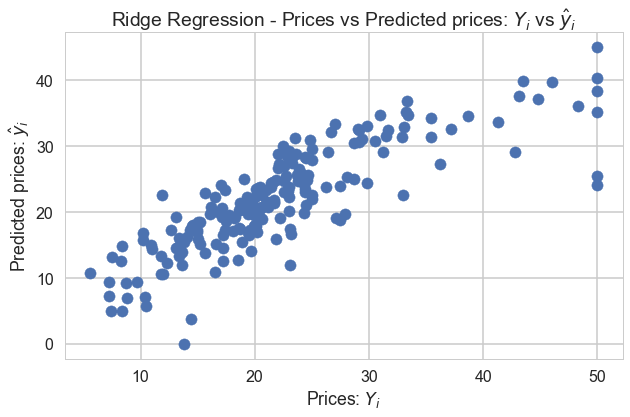

In [225]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [226]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

5.0832388089714868

In [227]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=5)
scores = []
for train, test in kf:
    linreg.fit(X[train],y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
scores

[3.5327963728837646,
 5.1084442514070476,
 5.7549939941491681,
 8.9907204260114071,
 5.7952010881678842]

In [228]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 5.083
RMSE on 5-fold CV: 5.836


## What about the choice of alpha?

We can try different values of alpha and observe the impact on cross-validation RMSE.

A programming note: np.dot() also works when dealing with a matrix and a vector. Note that the error,

$$E(e’e)$$

 is, by convention, a column vector. Its transpose e’ is a row vector, so e’e is a scalar, equal to the dot product of e with itself.


In [229]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X,y)
    y_pred = ridge.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        ridge.fit(X[train], y[train])
        y_pred = ridge.predict(X[test])
        err = y_pred - y[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 4.6795		 6.0930
0.418	 4.6842		 5.9954
0.826	 4.6921		 5.9530
1.234	 4.7000		 5.9285
1.642	 4.7070		 5.9117
2.050	 4.7133		 5.8989
2.458	 4.7187		 5.8884
2.866	 4.7234		 5.8793
3.274	 4.7276		 5.8711
3.682	 4.7313		 5.8637
4.090	 4.7346		 5.8567
4.498	 4.7375		 5.8502
4.906	 4.7402		 5.8440
5.313	 4.7426		 5.8380
5.721	 4.7448		 5.8323
6.129	 4.7469		 5.8267
6.537	 4.7488		 5.8213
6.945	 4.7505		 5.8161
7.353	 4.7522		 5.8110
7.761	 4.7537		 5.8060
8.169	 4.7552		 5.8011
8.577	 4.7565		 5.7964
8.985	 4.7578		 5.7917
9.393	 4.7591		 5.7871
9.801	 4.7603		 5.7827
10.209	 4.7614		 5.7783
10.617	 4.7625		 5.7740
11.025	 4.7635		 5.7697
11.433	 4.7646		 5.7655
11.841	 4.7655		 5.7614
12.249	 4.7665		 5.7574
12.657	 4.7674		 5.7535
13.065	 4.7683		 5.7496
13.473	 4.7692		 5.7457
13.881	 4.7700		 5.7419
14.289	 4.7708		 5.7382
14.697	 4.7717		 5.7345
15.104	 4.7724		 5.7309
15.512	 4.7732		 5.7274
15.920	 4.7740		 5.7239
16.328	 4.7747		 5.7

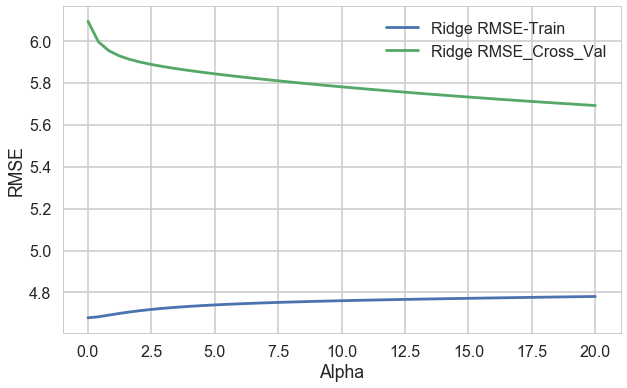

In [230]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

## Lasso regression

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

In [231]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,30,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    lasso.fit(X,y)
    y_pred = lasso.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        lasso.fit(X[train], y[train])
        y_pred = lasso.predict(X[test])
        err = y_pred - y[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 4.6834		 6.0198
0.622	 4.9634		 5.9162
1.234	 5.3521		 6.0007
1.846	 5.5688		 6.1154
2.458	 5.7279		 6.2671
3.070	 5.8551		 6.3815
3.682	 5.9975		 6.4882
4.294	 6.0515		 6.5282
4.906	 6.0737		 6.5579
5.518	 6.0987		 6.5899
6.130	 6.1266		 6.6252
6.742	 6.1572		 6.6609
7.354	 6.1906		 6.6856
7.967	 6.2267		 6.7123
8.579	 6.2655		 6.7414
9.191	 6.3068		 6.7729
9.803	 6.3350		 6.8042
10.415	 6.3613		 6.8357
11.027	 6.3892		 6.8671
11.639	 6.4185		 6.9005
12.251	 6.4492		 6.9358
12.863	 6.4813		 6.9726
13.475	 6.5149		 7.0106
14.087	 6.5498		 7.0501
14.699	 6.5861		 7.0910
15.311	 6.6237		 7.1334
15.923	 6.6626		 7.1771
16.535	 6.7028		 7.2222
17.147	 6.7443		 7.2687
17.759	 6.7870		 7.3165
18.371	 6.8309		 7.3656
18.983	 6.8760		 7.4160
19.595	 6.9223		 7.4677
20.207	 6.9698		 7.5216
20.819	 7.0183		 7.5788
21.431	 7.0680		 7.6372
22.043	 7.1187		 7.6969
22.656	 7.1705		 7.7599
23.268	 7.2233		 7.8241
23.880	 7.2771		 7.8894
24.492	 7.33

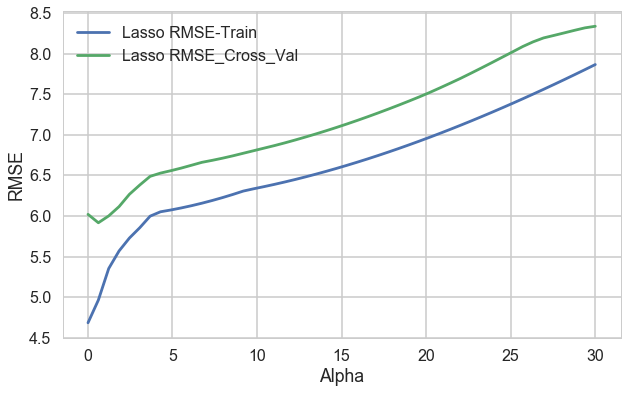

In [232]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Lasso RMSE-Train', 'Lasso RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

September 23, 2017